In [14]:
from __future__ import print_function
import astropy.cosmology as cosm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy import units as u
%matplotlib inline  

In [15]:
def plot_stuff(fig, cosmo, z):
    """
    Plots a 2x2 array of subplots with some cool cosmology stuff
    """
    #==============================================================================
    # Subplot 1
    #==============================================================================
    # Plot number one is in a 2X2 array of subplots
    # ocupying position 1
    ax1 = fig.add_subplot(221)
    # Make x ticks and labels  invisible
    plt.setp(ax1.get_xticklabels(), visible=False)
    # Calculate Temperature of CMB
    Tcmb = cosmo.Tcmb(z)
    ax1.plot(z, Tcmb, label=cosmo.name)
    ax1.set_ylabel('Temperature CMB [{}]'.format(Tcmb.unit))
    ax1.legend(loc='best')

    #==============================================================================
    # Subplot 2
    #==============================================================================    
    ax2 = fig.add_subplot(222)
    plt.setp(ax2.get_xticklabels(), visible=False)
    # Calculate Look-back time
    age = cosmo.lookback_time(z)
    ax2.plot(z, age)
    ax2.set_ylabel('Lookback Time [{}]'.format(age.unit))

    #==============================================================================
    # Subplot 3
    #==============================================================================    
    ax3 = fig.add_subplot(223)
    # Proper transverse distance corresponding to an angle of 1 radian
    # for an object at redshift z
    los_comoving_distance = cosmo.angular_diameter_distance(z).to('Gpc')
    # Calculate angular diameter distance
    ax3.plot(z, los_comoving_distance)
    ax3.set_xlabel('Redshift')
    ax3.set_ylabel('Angular Diameter\nDistance [{}]'
                   .format(los_comoving_distance.unit))

    #==============================================================================
    # Subplot 4
    #==============================================================================    
    ax4 = fig.add_subplot(224)
    los_comoving_distance = cosmo.comoving_distance(z).to('Gpc')
    # Calculate angular diameter distance
    ax4.plot(z, los_comoving_distance)
    ax4.set_xlabel('Redshift')
    ax4.set_ylabel('Comoving l.o.s.\nDistance [{}]'
                   .format(los_comoving_distance.unit))

In [16]:
# Seaborn options
sns.set_style('ticks')
sns.set_context('talk')

In [17]:
#==============================================================================
# Choose Set of Cosmological Parameters
#==============================================================================
cosmo1 = cosm.LambdaCDM(H0=50, Om0=0.5, Ode0=0.5, Tcmb0=5.,
                        name="Hiss's Universe")
cosmo2 = cosm.Planck15

# Print H_0
H0 = cosmo2.H0
print(H0)

67.74 km / (Mpc s)


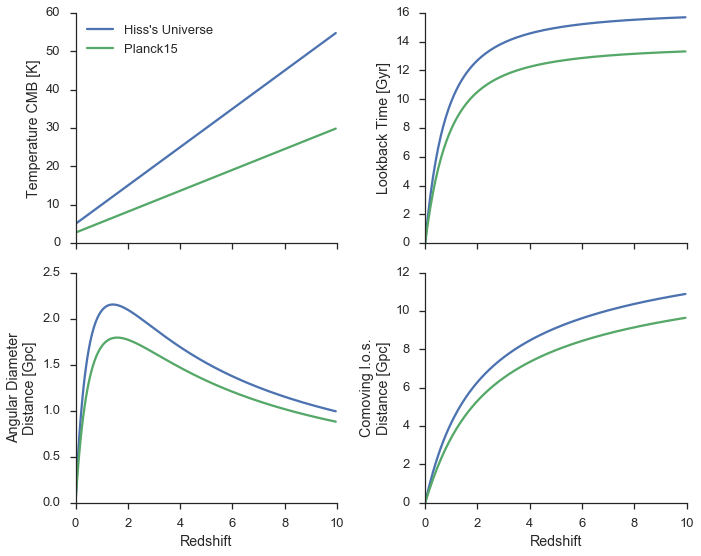

In [18]:
# Redshift Array
z = np.arange(0, 10, 0.05)

# Create Figure
fig = plt.figure(figsize=(10, 8))

# Plot as much as you want
plot_stuff(fig, cosmo1, z)
plot_stuff(fig, cosmo2, z)

# Remove upper and right axis
sns.despine()
# Make plot cover space efficiently
fig.tight_layout()